In [17]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
os.chdir('..')
import virl
from matplotlib import pyplot as plt

In [24]:
class Tabular_Policy_Agent:
        
    def __init__(self,env):
        
        #Hyper parameters
        self.policy_table = {}
        
        
        #
        
        self.num_of_actions = env.action_space.n
        self.env = env
        
        self.episodes = 200
        self.print_out_every_x_episodes = int(self.episodes/50)
        self.times_exploited = 0
        
        
         # hyper parameters for discretising state data
        self.highest = 600000000
        self.lowest = 0
        self.number_bins = 20
        
        # hyper parameters for epsilon explore
        self.initial_epsilon = 1 # initial
        self.decrease_factor = (1/self.episodes)/1.25 # epsilon
        print("Decrease Factor: " + str(self.decrease_factor))
        
    def continous_to_discrete(self,continous_state):
        bins = np.linspace(self.lowest,self.highest,num=self.number_bins)
        discrete = np.digitize(continous_state,bins)
        return tuple(discrete)
    
    def run_all_episodes(self):
        all_rewards = []
        epislon = self.initial_epsilon # at the start only explore
        
        
        
        for episode in range(1, self.episodes + 1):
            states,rewards = self.run_episode(epislon)
            total_reward = np.sum(rewards)

            if episode % self.print_out_every_x_episodes == 0:
                print("Episode number: " + str(episode) + ". Total reward in episode: " + str(total_reward) + ". Episode executed with epsilon = " + str(epislon))
                print("Average total reward in last " + str(self.print_out_every_x_episodes) + " episodes: " + str(np.mean(all_rewards[-self.print_out_every_x_episodes:])))
                print("Times exploited the last episode " + str(self.times_exploited))
                print("-----")
            self.times_exploited = 0
            all_rewards.append(total_reward)
            epislon -= self.decrease_factor #hyperparameter
            
        #returns all rewards and the last episodes state
        return states,all_rewards
    
    def run_episode(self,epislon):
        rewards = []
        states = []
        actions = []
        done = False
        
        state = self.env.reset()
        states.append(state)
      
        
        while not done:
            random_number = np.random.random()
            if random_number < epislon:
                #explore
                action = np.random.choice(self.num_of_actions)
                
            else:
                #exploit
                action = self.get_action(state)
                self.times_exploited += 1
              
            
            new_state, reward, done, i = self.env.step(action=action)
            
            
            
            states.append(new_state)
            actions.append(action)    
            rewards.append(reward)
            
            #update policy function
            self.update(new_state,action,reward)
        
            
            state = new_state
        return states,rewards
        
    def update(self,state,action,reward):
        #update the policy table
        state = self.continous_to_discrete(state)
        previous_action,current_best_reward =  self.policy_table.get(state,(-1,-100))
        if reward > current_best_reward:
            self.policy_table[state] = (action,reward)
                                                     
        
    def get_action(self,state):
        #tabular get best action from the policy
        state = self.continous_to_discrete(state)
        action,best_reward = self.policy_table[state]
        return action
    
    def get_action_text(self):
        return action_text
    
    def get_env(self):
        return env
    
    def get_chart_title(self):
        return "Action = " + action_text

In [25]:
actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]
env = virl.Epidemic(stochastic=False, noisy=False)
agent = Tabular_Policy_Agent(env)
states,rewards = agent.run_all_episodes()



Decrease Factor: 0.004
Episode number: 4. Total reward in episode: -2.042101328918017. Episode executed with epsilon = 0.988
Average total reward in last 4 episodes: -1.4194204061366378
Times exploited the last episode 1
-----
Episode number: 8. Total reward in episode: -2.0902498843134296. Episode executed with epsilon = 0.972
Average total reward in last 4 episodes: -1.5204482554859644
Times exploited the last episode 1
-----
Episode number: 12. Total reward in episode: -2.048571286642597. Episode executed with epsilon = 0.956
Average total reward in last 4 episodes: -1.7793741110519348
Times exploited the last episode 3
-----
Episode number: 16. Total reward in episode: -1.5307311104124863. Episode executed with epsilon = 0.94
Average total reward in last 4 episodes: -1.7891191627816774
Times exploited the last episode 5
-----
Episode number: 20. Total reward in episode: -1.4601597396261292. Episode executed with epsilon = 0.9239999999999999
Average total reward in last 4 episodes: 

Episode number: 156. Total reward in episode: -1.547073948878268. Episode executed with epsilon = 0.37999999999999945
Average total reward in last 4 episodes: -1.6706051015489751
Times exploited the last episode 34
-----
Episode number: 160. Total reward in episode: -1.7362645581585068. Episode executed with epsilon = 0.36399999999999944
Average total reward in last 4 episodes: -1.7065152317858279
Times exploited the last episode 33
-----
Episode number: 164. Total reward in episode: -1.5854364316488927. Episode executed with epsilon = 0.3479999999999994
Average total reward in last 4 episodes: -1.709355637343458
Times exploited the last episode 32
-----
Episode number: 168. Total reward in episode: -1.5581243538093028. Episode executed with epsilon = 0.3319999999999994
Average total reward in last 4 episodes: -1.698966334505616
Times exploited the last episode 35
-----
Episode number: 172. Total reward in episode: -1.774832207979761. Episode executed with epsilon = 0.3159999999999994


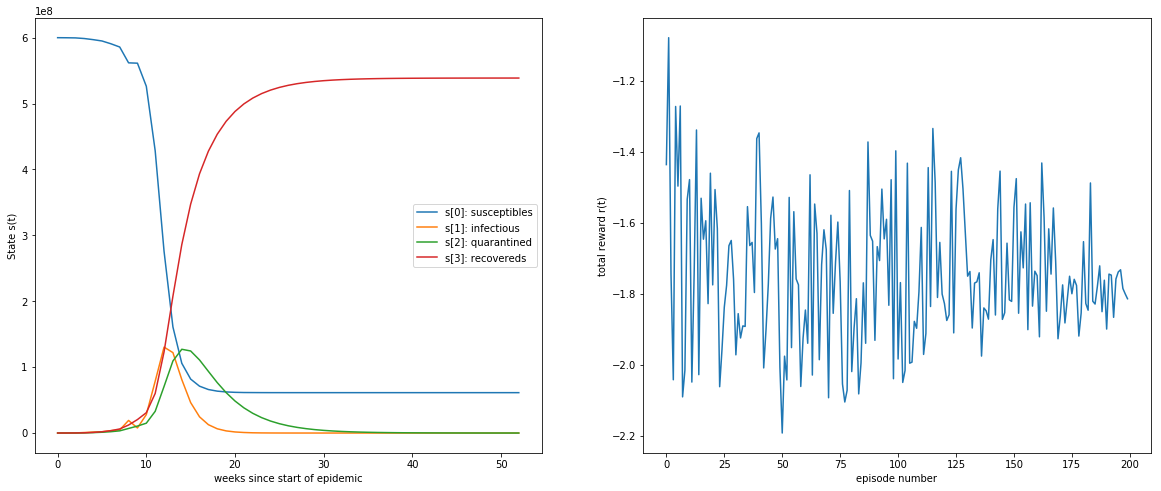

In [26]:
def plot(state,agent, rewards):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    labels = ['s[0]: susceptibles', 's[1]: infectious', 's[2]: quarantined', 's[3]: recovereds']
    states = np.array(state)
    for i in range(4):
        axes[0].plot(states[:,i], label=labels[i]);
    axes[0].set_xlabel('weeks since start of epidemic')
    axes[0].set_ylabel('State s(t)')
    axes[0].legend()
    
    axes[1].plot(rewards);
    axes[1].set_xlabel('episode number')
    axes[1].set_ylabel('total reward r(t)')
    
plot(states,agent,rewards)